<a href="https://colab.research.google.com/github/minjeongss/DeepLearning/blob/main/DeepLearning_30m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수강하는 강의
[인프런] <br>
30분 요약 강좌 시즌3: 초급자를 위한 손에 잡히는 딥러닝!


# 학습
1. 컴퓨터 프로그램이 과제류 T에 속하는 과제들을 수행
2. 수행한 성과를 측정한 측도 P
3. 어떤 경험 E에 의해 T의 과제에 대한 성과 측도 P가 게선되면 프로그램은 E로부터 학습한다!

# KDD 분석 절차
#### KDD란?
프로파일링 기술을 기반으로 통계적 패턴이나 지식을 찾기 위해 체계적으로 정리한 데이터 마이닝 프로세스
#### 단계
1. 데이터 존재
2. 데이터셋 선택
3. 목표 데이터 설정 완료
4. 데이터 전처리
5. 전처리 데이터 존재
6. 데이터 변환
7. 데이터 마이닝
8. 데이터 마이닝 결과 평가

# 딥러닝
인간의 신경망을 형상화한 것을 수학 수식으로 배운다!
#### 단계
Input layer -> Hidden layer -> Output layer

## 한글폰트 설치

In [ ]:
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#런타임 -> 런타임 다시 시작 후 실행
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

## 데이터 생성

In [7]:
import pandas as pd
import numpy as np

In [8]:
stock=[np.random.randint(10,50)+i*2 for i in range(100)] #주가

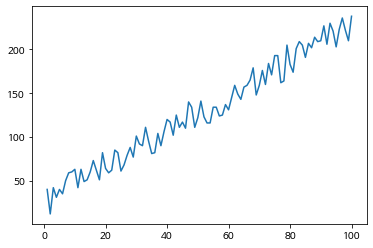

In [9]:
import matplotlib.pyplot as plt #시각화 모듈
plt.plot(np.arange(1,101), stock)
plt.show()

딥러닝에선 위의 그래프에서 하나의 일직선을 그릴 수 있는지, 다음 값을 예측할 수 있는지에 대해 알아본다.

## 딥러닝
복잡한 Hidden layer을 제거하고, Input layer과 Output layer만을 두고 본다.
<br>
### 표현
Input layer ---- (y=wx+b) ---- Output layer
<br>
*이때, y=wx+b는 수식을 말한다

In [10]:
independent=pd.DataFrame(np.arange(1,101)) #독립
dependent=pd.DataFrame(stock) #종속
independent.shape, dependent.shape

((100, 1), (100, 1))

In [11]:
import tensorflow as tf #딥러닝 라이브러리

In [12]:
#모델 준비
#모델이란? Input, Hidden, Output의 그림을 정해주는 것

x=tf.keras.layers.Input(shape=[1]) #독립변수의 col
y=tf.keras.layers.Dense(1)(x) #종석변수의 col(뉴런의 개수)
model=tf.keras.models.Model(x,y)
model.compile(loss='mse') #MSE(Mean Squared error)

In [25]:
model.fit(independent,dependent,epochs=10000,verbose=0) #10000번 학습, 학습한 것 보여줌X
model.fit(independent,dependent,epochs=10) #10번 학습, 학습한 것 보여줌O


Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 128.1645
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 128.1094
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 128.1701
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 128.0191
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 128.0755
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 128.0825
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 128.0612
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 128.0335
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 127.9943
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 127.9847


학습을 실행시켰을 때, 나오는 `loss`는 손실을 말한다.
<br>
계속 학습을 반복하면 `loss`의 값이 감소한다!

In [26]:
model.predict([50])
model.predict([40])
#50과 40은 stock을 표현하는 그래프에서 40과 50에 해당하는 값을 출력하는 것이다

array([[106.00892]], dtype=float32)

In [27]:
model.get_weights()

[array([[2.0370643]], dtype=float32), array([24.526346], dtype=float32)]

In [29]:
2.037*40+24.526 #wx+b

106.00599999999999

In [ ]:
model.predict(independent) #전체 독립 예측

첫 번째의 값: w <br>
두 번째의 값: b
<br>
y=wx+b에서 x는 50,40 등을 넣으면 최종적으로 y가 예측이 된다! 
<br><br>
즉, 딥러닝에선 w,b를 자동으로 찾아주게 된다.
x=독립변수(일자) <br>
y=종속변수(stock)
<br><br>
정확하지 않기에, 계속해서 훈련을 시킨다.<br>
`epochs=100`에서 `epochs=10000`으로 늘린다면 훈련의 수를 더 늘리게 되는 것이다.



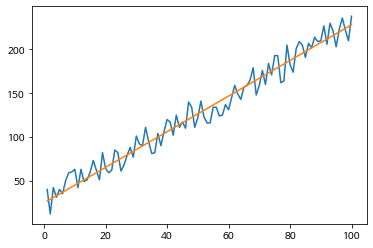

In [30]:
plt.plot(np.arange(1,101),stock)
plt.plot(np.arange(1,101),2.037*np.arange(1,101)+24.526)

plt.show()

In [31]:
errorValue=dependent-model.predict(independent) #오차값
errorValue

,0
0,13.436590
1,-16.600475
2,11.362461
3,-1.674603
4,5.288330
...,...
95,2.915482
96,13.878403
97,-2.158661
98,-16.195724


In [33]:
errorValueDouble=errorValue**2
errorValueDouble

,0
0,180.541956
1,275.575781
2,129.105522
3,2.804294
4,27.966435
...,...
95,8.500033
96,192.610062
97,4.659817
98,262.301492


In [34]:
(errorValueDouble.sum())/100 #MSE

0    127.894306
dtype: float64

## 최소 제곱법
기존의 통계학적 지식으로 위에서 예측한 노란색 선을 그리는 방법

### a값 구하기

In [35]:
mulTwo=independent*dependent
int(100*mulTwo.sum())

81445300

In [37]:
int(independent.sum()*dependent.sum())

64761200

In [38]:
int(100*(independent**2).sum())

33835000

In [39]:
int(independent.sum()*independent.sum())

25502500

In [43]:
numeratorW=int(100*mulTwo.sum())-int(independent.sum()*dependent.sum())#분자
denominatorW=int(100*(independent**2).sum())-int(independent.sum()*independent.sum()) #분모

In [44]:
numeratorW/denominatorW #w값

2.002292229222922

In [45]:
model.get_weights()

[array([[2.0370643]], dtype=float32), array([24.526346], dtype=float32)]

### b값 구하기

In [46]:
numeratorB=((independent**2).sum()*dependent.sum())-(independent.sum()*(independent*dependent).sum())#분자
denominatorB=int(100*(independent**2).sum())-int(independent.sum()*independent.sum()) #분모

In [47]:
numeratorB/denominatorB

0    27.124242
dtype: float64

### 통계학적이 아닌 딥러닝으로 계산하는 이유
더 복잡한 데이터와 패턴을 계산할 수 있기 때문이다.

## 단순 데이터의 히든레이어
### 구성요소
Input layer: 2개(x1,x2)<br>
Hidden layer: 2개<br>
Output layer: 1개

### 관계
1. y = w1*x1 +b
1. y = w2*x1 +b
1. y = w3*x2 +b
1. y = w4*x2 +b
1. y = w5*x3 +b
1. y = w6*x4 +b

+ x3 = w1 * x1 + w3 * y2 
+ x4 = w2 * x1 + w4 * y2 
